**Importamos las librerías necesarias para trabajar con el dataset.**

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos el dataset usando las funcionalidades de Pandas e imprimimos el Shape del dataset, el index y las columnas en el que observamos la cantidad de instancias y la cantidad y nombre de las columnas. A su vez visualizamos las cinco primeras instancias dandonos una idea de los tipos de datos.**

In [128]:
dataset=pd.read_csv("DS_Proyecto_01_Datos_Properati (2).csv")
print(dataset.shape)
print(dataset.index)
print(dataset.columns)
dataset.head()

(146660, 19)
RangeIndex(start=0, stop=146660, step=1)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


**Vemos si existen faltantes en alguna columna en porcentaje para una mas rapida intendificacion de la importancia de los faltantes.**

In [129]:
for col in dataset.columns:
    nulos=dataset[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/146660))

start_date 0.00%
end_date 0.00%
created_on 0.00%
lat 6.77%
lon 6.79%
l1 0.00%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.06%
surface_total 14.00%
surface_covered 14.74%
price 0.00%
currency 0.00%
title 0.00%
description 0.00%
property_type 0.00%
operation_type 0.00%


**Eliminamos las columnas que consideramos que para este proyecto no son de utilidad y observamos como nos queda el dataframe con un Shape.**

In [130]:
columnas_descartar=["start_date","end_date","created_on","currency","operation_type",'l1',"title","description",'lat', 'lon']
dataset=dataset.drop(columns=columnas_descartar)
dataset.shape

(146660, 9)

**Vemos cuantas columnas categoricas nos quedaron para mas adelante porder trabajar con ellas, transformandolas segun algun metodo.**

In [131]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l2               146660 non-null  object 
 1   l3               146660 non-null  object 
 2   rooms            146660 non-null  float64
 3   bedrooms         146660 non-null  float64
 4   bathrooms        140703 non-null  float64
 5   surface_total    126133 non-null  float64
 6   surface_covered  125046 non-null  float64
 7   price            146660 non-null  float64
 8   property_type    146660 non-null  object 
dtypes: float64(6), object(3)
memory usage: 10.1+ MB
None


**Renombramos las columnas L2 y L3 para que sea mas claro y evitar confusiones.**

In [132]:
dataset.rename({'l2':"Zona", 'l3':"Localidad"},axis=1, inplace=True)

## Outliers.

**Ahora vamos a trabajar los outliers. Usaremos la tecnica de los tres sigmas.**

**Primero hacemos una copia del dataset. Ya que separo en un dataset nuevo las instancias con los valores faltantes antes visto para poder completarlos sin la interferencia de outliers que producirian datos erroneos.**

In [133]:
datasetA=dataset.copy()

In [134]:
datasetA=datasetA[(datasetA["bathrooms"].isnull())|(datasetA["surface_total"].isnull())|(datasetA["surface_covered"].isnull())]
datasetA.shape

(23842, 9)

**Segundo elimino del dataset original estas instancias ya que adelante las volvere a poner. Todo con el motivo de no repetir informacion.** 

In [135]:
dataset=dataset.dropna()

**Ahora trabajaremos con el dataset original.**

**Para no eliminar valores outliers de modo general, se hizo un siglo for basandome en el tipo de propiedad y recorriendo todas las columnas numericas.**

**Lo que quiero lograr es eliminar los outliers de cada tipo de propiedad ya que considero que son distintos por cada uno.**

**A estos valores los convertimos en NaN para luego eliminarlos.**

In [136]:
list_Tipo_propiedad=["Casa","Departamento","PH","Casa de campo","Depósito","Local comercial","Oficina","Cochera","Lote","Otro"]
list_Column=["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]
for i in list_Tipo_propiedad:
    dataset[(dataset.property_type==i)]
    for col in list_Column:
        media=dataset[col].mean()
        std=dataset[col].std()
        res=(dataset[col]> (media + (3*std)))|(dataset[col]< (media - (3*std)))
        dataset.loc[res,col]=np.nan


**Podemos ver en  la descripcion de los datos que los valores ya estan libres de outliers y son coherentes.**

**(Aun no los hemos eliminado pero para las estadisticas no son considerados).**

In [137]:
dataset.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,119989.000000,121870.000000,118149.000000,106007.000000,111035.000000,112050.000000
mean,3.016702,2.030976,1.479208,82.646372,72.833260,181740.351307
std,1.158054,0.991517,0.662080,43.845673,35.834333,92918.488310
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,50.000000,45.000000,110000.000000
50%,3.000000,2.000000,1.000000,70.000000,63.000000,159500.000000
75%,4.000000,3.000000,2.000000,104.000000,91.000000,236000.000000
max,6.000000,5.000000,3.000000,217.000000,180.000000,460100.000000


**Eliminamos  los Nan que son lo que corresponden a los Outliers.**

In [138]:
dataset=dataset.dropna()
dataset.isna().sum()

Zona               0
Localidad          0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

**Para una mayor seguridad graficamos los boxplots de las variables y volvemos a corroborar que estan correctos.** 

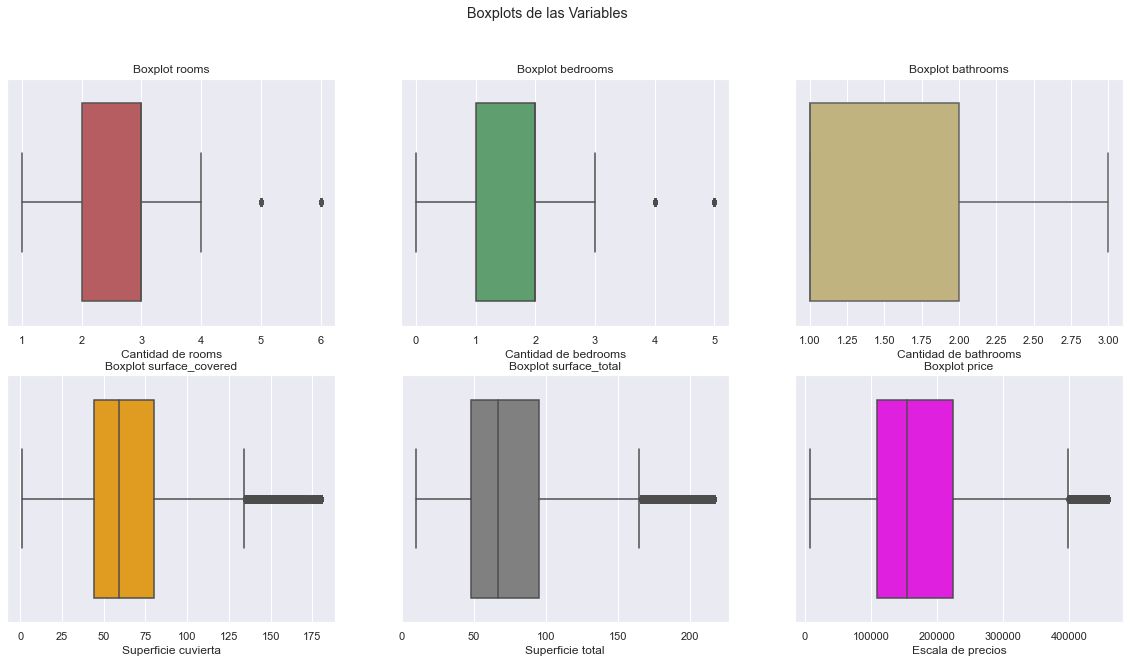

In [139]:
sns.set()
plt.figure(figsize=(20,10))
plt.suptitle("Boxplots de las Variables")
plt.subplot(2,3,1)
sns.boxplot(x=dataset["rooms"],color="r");plt.title("Boxplot rooms");plt.xlabel("Cantidad de rooms")
plt.subplot(2,3,2)
sns.boxplot(x=dataset["bedrooms"],color="g");plt.title("Boxplot bedrooms");plt.xlabel("Cantidad de bedrooms")
plt.subplot(2,3,3)
sns.boxplot(x=dataset["bathrooms"],color="y");plt.title("Boxplot bathrooms");plt.xlabel("Cantidad de bathrooms")
plt.subplot(2,3,4)
sns.boxplot(x=dataset["surface_covered"],color="orange");plt.title("Boxplot surface_covered");plt.xlabel("Superficie cuvierta")
plt.subplot(2,3,5)
sns.boxplot(x=dataset["surface_total"],color="grey");plt.title("Boxplot surface_total");plt.xlabel("Superficie total")
plt.subplot(2,3,6)
sns.boxplot(x=dataset["price"],color="magenta");plt.title("Boxplot price");plt.xlabel("Escala de precios")
plt.show()

**Juntamos el dataset filtrado de los valores faltantes del dataset original  (nueva copia) y el dataset en el que recientemente eliminamos los outliers.**

**Observamos de paso como cambio el porcentaje de los valores faltantes y vemos que aumento.**

In [140]:
dataset=dataset.append(datasetA)
print(dataset.shape)
for col in dataset.columns:
    nulos=dataset[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/122423))

(122371, 9)
Zona 0.00%
Localidad 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 4.87%
surface_total 16.77%
surface_covered 17.66%
price 0.00%
property_type 0.00%


**Ahora se nos presenta la duda si con los datos adjuntos tenemos nuevos outliers ya que al ser dos dataset unidos y solo haber trabajado outliers en uno, es logico que hayan aparecido, por los que vamos a volver a graficar los  boxplot de los atributos numericos.**

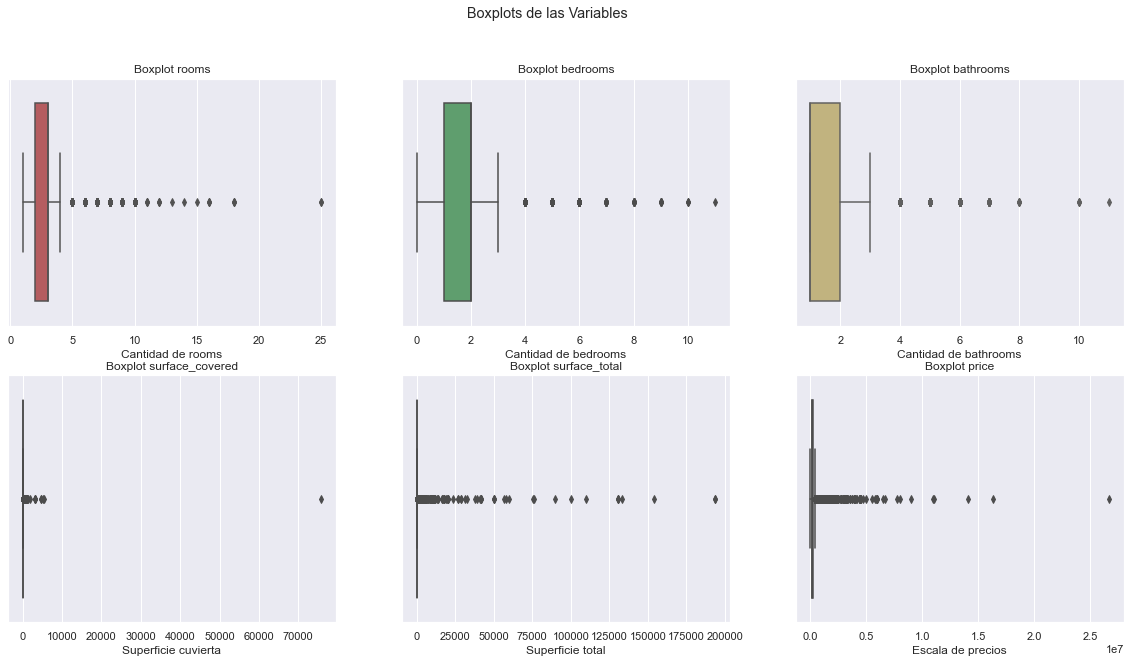

In [141]:
sns.set()
plt.figure(figsize=(20,10))
plt.suptitle("Boxplots de las Variables")
plt.subplot(2,3,1)
sns.boxplot(x=dataset["rooms"],color="r");plt.title("Boxplot rooms");plt.xlabel("Cantidad de rooms")
plt.subplot(2,3,2)
sns.boxplot(x=dataset["bedrooms"],color="g");plt.title("Boxplot bedrooms");plt.xlabel("Cantidad de bedrooms")
plt.subplot(2,3,3)
sns.boxplot(x=dataset["bathrooms"],color="y");plt.title("Boxplot bathrooms");plt.xlabel("Cantidad de bathrooms")
plt.subplot(2,3,4)
sns.boxplot(x=dataset["surface_covered"],color="orange");plt.title("Boxplot surface_covered");plt.xlabel("Superficie cuvierta")
plt.subplot(2,3,5)
sns.boxplot(x=dataset["surface_total"],color="grey");plt.title("Boxplot surface_total");plt.xlabel("Superficie total")
plt.subplot(2,3,6)
sns.boxplot(x=dataset["price"],color="magenta");plt.title("Boxplot price");plt.xlabel("Escala de precios")
plt.show()

**Las nuevas instancias agregan valores muy dispersos en las variables "surface_total", "surface_covered" y "price".**

**Para solucionar esto vamos a usar la tecnica de IQR.**

In [142]:
Q1_surface_T=dataset["surface_total"].quantile(0.25)
Q3_surface_T=dataset["surface_total"].quantile(0.75)
IQR=Q3_surface_T-Q1_surface_T
BI_surface_T=(Q1_surface_T-1.5*IQR)
BS_surface_T=(Q3_surface_T+1.5*IQR)
print("BI_surface_T:",BI_surface_T)
print("BS_surface_T:",BS_surface_T)

BI_surface_T: -25.5
BS_surface_T: 170.5


In [143]:
Q1_surface_C=dataset["surface_covered"].quantile(0.25)
Q3_surface_C=dataset["surface_covered"].quantile(0.75)
IQR=Q3_surface_C-Q1_surface_C
BI_surface_C=(Q1_surface_C-1.5*IQR)
BS_surface_C=(Q3_surface_C+1.5*IQR)
print("BI_surface_C:",BI_surface_C)
print("BS_surface_C:",BS_surface_C)

BI_surface_C: -10.0
BS_surface_C: 134.0


In [144]:
Q1_price=dataset["price"].quantile(0.25)
Q3_price=dataset["price"].quantile(0.75)
IQR=Q3_price-Q1_price
BI_price=(Q1_price-1.5*IQR)
BS_price=(Q3_price+1.5*IQR)
print("BI_price:",BI_price)
print("BS_price:",BS_price)

BI_price: -81000.0
BS_price: 415000.0


In [145]:
dataset=dataset[(dataset["surface_total"]<=171)] 
dataset=dataset[(dataset["surface_covered"]<=134)] 
dataset=dataset[(dataset["price"]<=414855)] 

**Observamos que las distribuciones tanto en los histogramas como en los boxplot son adecuadas.** 

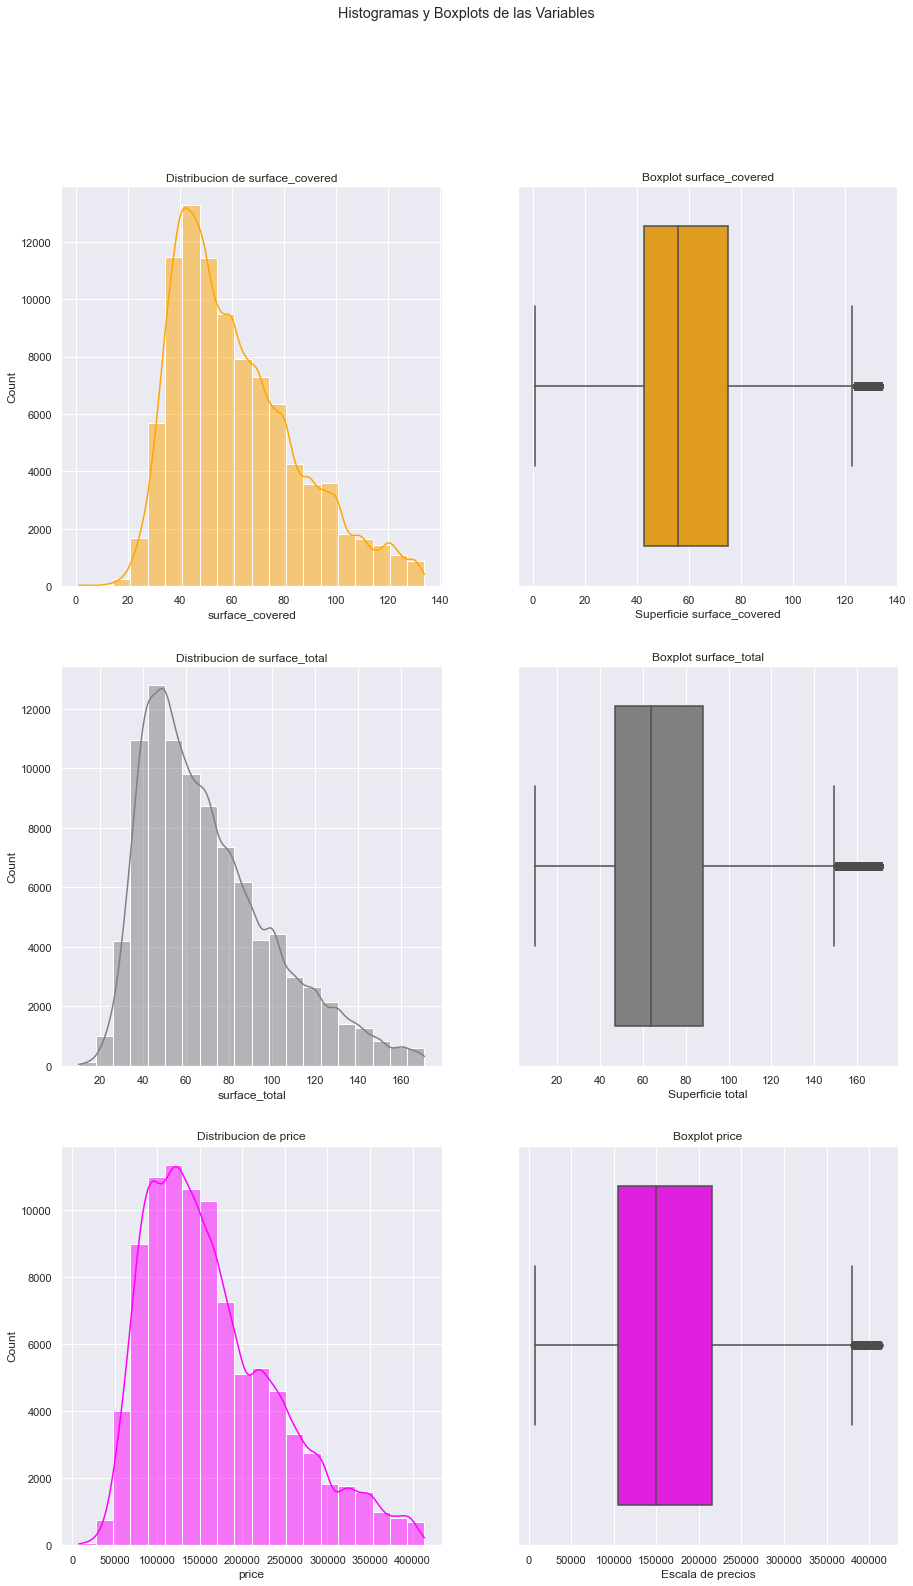

In [146]:
sns.set()
plt.figure(figsize=(15,25))
plt.suptitle("Histogramas y Boxplots de las Variables")
plt.subplot(3,2,1)
sns.histplot(x=dataset["surface_covered"],bins=20,color="orange",kde=True);plt.title("Distribucion de surface_covered")
plt.subplot(3,2,2)
sns.boxplot(x=dataset["surface_covered"],color="orange");plt.title("Boxplot surface_covered");plt.xlabel("Superficie surface_covered")
plt.subplot(3,2,3)
sns.histplot(x=dataset["surface_total"],bins=20,color="grey",kde=True);plt.title("Distribucion de surface_total")
plt.subplot(3,2,4)
sns.boxplot(x=dataset["surface_total"],color="grey");plt.title("Boxplot surface_total");plt.xlabel("Superficie total")
plt.subplot(3,2,5)
sns.histplot(x=dataset["price"],bins=20,color="magenta",kde=True);plt.title("Distribucion de price")
plt.subplot(3,2,6)
sns.boxplot(x=dataset["price"],color="magenta");plt.title("Boxplot price");plt.xlabel("Escala de precios")
plt.show()

## Imputacion de valores faltantes

**Notamos que aun hay valores faltantes en la variable Bathrooms los cuales vamos a imputar.**

**Tambien corroboramos la coherencia de los estaditicos.**

In [147]:
print(dataset.shape)
for col in dataset.columns:
    nulos=dataset[col].isna().sum()
    print(col, "{:.2f}%".format(nulos*100/95573))

dataset.describe()

(93161, 9)
Zona 0.00%
Localidad 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 1.26%
surface_total 0.00%
surface_covered 0.00%
price 0.00%
property_type 0.00%


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,93161.000000,93161.000000,91955.000000,93161.000000,93161.000000,93161.000000
mean,2.646880,1.700561,1.307063,70.481103,61.254431,166019.826913
std,0.927077,0.779024,0.527221,30.235493,23.768340,78727.985092
min,1.000000,0.000000,1.000000,10.000000,1.000000,7500.000000
25%,2.000000,1.000000,1.000000,47.000000,43.000000,105000.000000
50%,3.000000,2.000000,1.000000,64.000000,56.000000,149000.000000
75%,3.000000,2.000000,2.000000,88.000000,75.000000,215000.000000
max,7.000000,6.000000,3.000000,171.000000,134.000000,414000.000000


**Consultamos en que tipo de propiedad quedaron valores nulos, para hacer la imputacion de los mismo y no hacer un esfuerzo improductivo de programar el de todos los tipos.**

In [148]:
Consulta_isna_bathrooms=dataset[(dataset["bathrooms"].isnull())]
Consulta_isna_bathrooms=Consulta_isna_bathrooms[["bathrooms","property_type"]].groupby("property_type").sum()
Consulta_isna_bathrooms

,bathrooms
property_type,
Casa,0.0
Departamento,0.0
Local comercial,0.0
Oficina,0.0
PH,0.0


**Imputamos los valores faltantes de la variable Bathrooms con la mediana en los tipos de propiedad correspondientes.Generando distintos dataset que luego uniremos en uno nuevo.**

In [149]:
dataset_bathrooms_Casa=dataset[(dataset.property_type=="Casa") ]
bathroomsMedian_Casa=dataset_bathrooms_Casa[["bathrooms","Localidad"]].groupby("Localidad").agg(pd.Series.median)
bathroomsMedian_Casa.to_dict()
dataset_bathrooms_Casa=dataset_bathrooms_Casa.set_index("Localidad")
dataset_bathrooms_Casa.bathrooms.fillna(bathroomsMedian_Casa.to_dict()["bathrooms"],inplace=True)
dataset_bathrooms_Casa.reset_index(inplace=True)

In [150]:
dataset_bathrooms_Departamento=dataset[(dataset.property_type=="Departamento")]
bathroomsMedian_Departamento=dataset_bathrooms_Departamento[["bathrooms","Localidad"]].groupby("Localidad").agg(pd.Series.median)
bathroomsMedian_Departamento.to_dict()
dataset_bathrooms_Departamento=dataset_bathrooms_Departamento.set_index("Localidad")
dataset_bathrooms_Departamento.bathrooms.fillna(bathroomsMedian_Departamento.to_dict()["bathrooms"],inplace=True)
dataset_bathrooms_Departamento.reset_index(inplace=True)

In [151]:
dataset_bathrooms_PH=dataset[(dataset.property_type=="PH")]
bathroomsMedian_PH=dataset_bathrooms_PH[["bathrooms","Localidad"]].groupby("Localidad").agg(pd.Series.median)
bathroomsMedian_PH.to_dict()
dataset_bathrooms_PH=dataset_bathrooms_PH.set_index("Localidad")
dataset_bathrooms_PH.bathrooms.fillna(bathroomsMedian_PH.to_dict()["bathrooms"],inplace=True)
dataset_bathrooms_PH.reset_index(inplace=True)

In [152]:
dataset_bathrooms_Localcomercial=dataset[(dataset.property_type=="Local comercial")]
bathroomsMedian_Localcomercial=dataset_bathrooms_Localcomercial[["bathrooms","Localidad"]].groupby("Localidad").agg(pd.Series.median)
bathroomsMedian_Localcomercial.to_dict()
dataset_bathrooms_Localcomercial=dataset_bathrooms_Localcomercial.set_index("Localidad")
dataset_bathrooms_Localcomercial.bathrooms.fillna(bathroomsMedian_Localcomercial.to_dict()["bathrooms"],inplace=True)
dataset_bathrooms_Localcomercial.reset_index(inplace=True)

Quedaron NaN ya que no se pudieron completar por que no existia mediana en ciertas Localidades te este Tipo de propiedad.

In [153]:
dataset_bathrooms_Localcomercial.bathrooms.median()
dataset_bathrooms_Localcomercial.bathrooms.fillna(dataset_bathrooms_Localcomercial.bathrooms.median(),inplace=True)

In [154]:
dataset_bathrooms_Oficina=dataset[(dataset.property_type=="Oficina")]
bathroomsMedian_Oficina=dataset_bathrooms_Oficina[["bathrooms","Localidad"]].groupby("Localidad").agg(pd.Series.median)
bathroomsMedian_Oficina.to_dict()
dataset_bathrooms_Oficina=dataset_bathrooms_Oficina.set_index("Localidad")
dataset_bathrooms_Oficina.bathrooms.fillna(bathroomsMedian_Oficina.to_dict()["bathrooms"],inplace=True)
dataset_bathrooms_Oficina.reset_index(inplace=True)

In [155]:
dataset1=dataset_bathrooms_Casa.append(dataset_bathrooms_Departamento)
dataset1=dataset1.append(dataset_bathrooms_PH)
dataset1=dataset1.append(dataset_bathrooms_Localcomercial)
dataset1=dataset1.append(dataset_bathrooms_Oficina)

**Nos aseguramos que no haya superficies cuviertas mayores que superficies totales.**

In [156]:
dataset1["surface_covered"]=np.where((dataset1["surface_covered"].values) > (dataset1["surface_total"].values),(dataset1["surface_total"].values),(dataset1["surface_covered"].values))

**Nos quedaron 93115 instancias y 9 atributos.**

**Ya no tenemos valores faltantes.**

**Observamos que tenemos tres variables Objeto, las cuales son las que vamos a transformar a continuacion.**

In [157]:
print(dataset1.isna().sum())
print(dataset1.info())
dataset1.head(2)

Localidad          0
Zona               0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93115 entries, 0 to 323
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Localidad        93115 non-null  object 
 1   Zona             93115 non-null  object 
 2   rooms            93115 non-null  float64
 3   bedrooms         93115 non-null  float64
 4   bathrooms        93115 non-null  float64
 5   surface_total    93115 non-null  float64
 6   surface_covered  93115 non-null  float64
 7   price            93115 non-null  float64
 8   property_type    93115 non-null  object 
dtypes: float64(6), object(3)
memory usage: 7.1+ MB
None


,Localidad,Zona,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Tigre,Bs.As. G.B.A. Zona Norte,3.0,2.0,2.0,89.0,79.0,219000.0,Casa
1,San Cristobal,Capital Federal,3.0,1.0,2.0,116.0,116.0,290000.0,Casa


## Transformaciones de las columnas Dtype "Object".

**La primera variable a transformar es "Property_Type" de la cual vamos a considerar -Departamente-, -PH-, -Casa- que son las que mas instancias tienen y las demas como -Otros-.**
**Para esto haremos mas adelante un Dummy.** 


In [158]:
dicc_tipo=dataset1["property_type"].value_counts().iloc[0:3].to_dict()
dicc_tipo

{'Departamento': 79894, 'PH': 10547, 'Casa': 2336}

In [159]:
n_dicc_tipo={}
for clave in dicc_tipo.keys():
    n_dicc_tipo[clave]=clave
n_dicc_tipo

{'Departamento': 'Departamento', 'PH': 'PH', 'Casa': 'Casa'}

In [160]:
dataset1.property_type=dataset1.property_type.map(n_dicc_tipo)
dataset1.fillna("Otros", inplace=True)

**La segunda variable a transformar es "Zona" de la cual vamos a considerar -Capital Federal- como la clasificacion con mas instancia y las demas como -Otros-. Para esto haremos mas adelante un Dummy.**

In [161]:
dataset1.Zona.value_counts()

Capital Federal             66904
Bs.As. G.B.A. Zona Norte    14674
Bs.As. G.B.A. Zona Sur       6283
Bs.As. G.B.A. Zona Oeste     5254
Name: Zona, dtype: int64

In [162]:
n_dicc_zona={"Capital Federal":"Capital Federal"}
n_dicc_zona

{'Capital Federal': 'Capital Federal'}

In [163]:
dataset1.Zona=dataset1.Zona.map(n_dicc_zona)


In [164]:
dataset1.Zona.value_counts()

Capital Federal    66904
Name: Zona, dtype: int64

In [165]:
dataset1.fillna("Otros", inplace=True)

In [166]:
dataset1.Zona.value_counts()

Capital Federal    66904
Otros              26211
Name: Zona, dtype: int64

**Aplicamos dummy a las variables "Zona" y "Property_Type".**

In [167]:
zona_dummy=pd.get_dummies(dataset1["Zona"],prefix="Zona")
property_type_dummy=pd.get_dummies(dataset1["property_type"],prefix="Tipo_Propiedada")

In [168]:
dataset1=pd.concat([dataset1,zona_dummy],axis=1)
dataset1=pd.concat([dataset1,property_type_dummy],axis=1)

Aqui descartamos las columnas originales de "Zona" y "property_type".

In [169]:
columnas_descartar=["Zona","property_type"]
dataset1=dataset1.drop(columns=columnas_descartar)
print(dataset1.shape)

(93115, 13)


**Ahora transformaremos la variable categorica "Localidad" en una variable numerica, aqui no utilizaremos Dummy ya que hay una gran cantidad y nos hara que el dataset se agrande mucho.**

**Haremos el promedio del valor del metro cuadrado por localidad, una medida que consideramos que tiene razonabilidad para transformar numericamente esta variable.**

In [171]:
def metrocuadrado(fila):
    resultado=fila["price"]/fila['surface_total']
    return resultado

In [172]:
dataset1["m2"]=dataset1.apply(metrocuadrado,axis=1)

In [173]:
mean_m2_Localidad=dataset1[["m2","Localidad"]].groupby("Localidad").mean()

In [174]:
dataset1.Localidad=dataset1.Localidad.map(mean_m2_Localidad.to_dict()["m2"])

In [175]:
dataset1.shape

(93115, 14)

In [176]:
columnas_descartar=["m2"]
dataset1=dataset1.drop(columns=columnas_descartar)
print(dataset1.shape)
dataset1.head()

(93115, 13)


,Localidad,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Zona_Capital Federal,Zona_Otros,Tipo_Propiedada_Casa,Tipo_Propiedada_Departamento,Tipo_Propiedada_Otros,Tipo_Propiedada_PH
0,2570.138868,3.0,2.0,2.0,89.0,79.0,219000.0,0,1,1,0,0,0
1,2000.281432,3.0,1.0,2.0,116.0,116.0,290000.0,1,0,1,0,0,0
2,1820.195926,3.0,2.0,1.0,171.0,120.0,179900.0,1,0,1,0,0,0
3,2414.533059,3.0,2.0,1.0,71.0,68.0,174000.0,1,0,1,0,0,0
4,1494.136411,3.0,2.0,2.0,82.0,80.0,95000.0,0,1,1,0,0,0


In [177]:
datasetSS=dataset1.copy()

Dejo una copia si scalar.

## Escalado de datos.

**Escalamos todas las columnas salvo las columnas a las cuales se le hizo dummy y a  "price" que es nuestra variable target y queremos que mantenga su escala para mas adelante poder interpretar las metricas.**

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
scaler.fit(dataset1[["Localidad","rooms","bedrooms","bathrooms","surface_total","surface_covered"]])


StandardScaler()

In [180]:
dataset1[["Localidad","rooms","bedrooms","bathrooms","surface_total","surface_covered"]]=scaler.transform(dataset1[["Localidad","rooms","bedrooms","bathrooms","surface_total","surface_covered"]])

In [181]:
print(dataset1.shape)
dataset1.head()

(93115, 13)


,Localidad,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Zona_Capital Federal,Zona_Otros,Tipo_Propiedada_Casa,Tipo_Propiedada_Departamento,Tipo_Propiedada_Otros,Tipo_Propiedada_PH
0,0.196654,0.381261,0.384672,1.325915,0.612987,0.750924,219000.0,0,1,1,0,0,0
1,-0.802224,0.381261,-0.899108,1.325915,1.506171,2.310000,290000.0,1,0,1,0,0,0
2,-1.117888,0.381261,0.384672,-0.578358,3.325621,2.478548,179900.0,1,0,1,0,0,0
3,-0.076100,0.381261,0.384672,-0.578358,0.017530,0.287415,174000.0,1,0,1,0,0,0
4,-1.689423,0.381261,0.384672,1.325915,0.381420,0.793061,95000.0,0,1,1,0,0,0


**Aqui finalizamos el preprocesamiento de los datos. Nos quedo un dataset de 93115 instancias y 13 columnas.**

## Comparativa de los modelos del "Proyecto 1",Vecinos mas Cercanos  y Arbol de decision.

importamos las librerias que vamos a utilizar.

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

La variables a predecir es "price" y las variables predictores seran todas las demas del dataset, ya que son las que no eliminamos y las que trabajamos en detalle para optimizarlas.

In [55]:
X=dataset1[["Localidad","rooms","bedrooms","bathrooms","surface_total","surface_covered","Zona_Capital Federal","Zona_Otros","Tipo_Propiedada_Casa","Tipo_Propiedada_Departamento","Tipo_Propiedada_Otros","Tipo_Propiedada_PH"]]
y=dataset1["price"]

Hacemos el train test split.

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

**Datos tomados del proyecto 1 Modelo KnnR.**

Como primer comparacion de los resultados de los modelos del primer proyecto, vuelvo a entrenar el modelo de vecinos mas cercanos con hiperparametros "distance-, n_neighbors= 15", ya que este fue el que mejor resultados me dio, con el dataset nuevo.

RESULTADOS DEL "PROYECTO 1": Modelo KnnR -distance-, n_neighbors= 15.
 
RMSE_Train: 57184.082198878

RMSE_y_test: 126780.27055526315

r2_score_Train: 0.9632225336739133
 
r2_score_y_test: 0.8237484347725157

Notamos que en el RMSE la diferencia entre el train y el test es extremadamente alta y tambien que los errores en general son muy altos, esto no dice que es un modelo con alta bias y alta varianza, en esto caso lo mejor en volver a trabajar el dataset y profundizar el preprocesamiento y agregar variables.
Justamente esto es lo que hicimos, por lo que vamos a comparar estos resultado, volviendo a entrenar el mismos modelo con el data set nuevos.

In [57]:
kkn_R=KNeighborsRegressor(n_neighbors=15, weights="distance")
kkn_R.fit(X_train,y_train)

kknR_predicion_test=kkn_R.predict(X_test)
kknR_predicion_train=kkn_R.predict(X_train)

In [58]:
print("Modelo KnnR -distance-, n_neighbors= 15")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,kknR_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,kknR_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,kknR_predicion_train))
print("r2_score_test:",r2_score(y_test,kknR_predicion_test))

Modelo KnnR -distance-, n_neighbors= 15
 
RMSE_Train: 14122.876958263141
RMSE_test: 28869.954527330443
 
r2_score_Train: 0.9677363481102831
r2_score_test: 0.866814551362714


Hacemos validacion cruzada para evitar una evaluacion optimista.
Los resultados varian poco con respecto a los resultados de entregados por el modelo si validacion cruzada.

In [59]:
scoringKKN=["neg_root_mean_squared_error","r2"]
scoresKKN=cross_validate(kkn_R,X,y, scoring=scoringKKN, cv=10,n_jobs=-1,return_train_score=True)
sorted(scoresKKN.keys())

['fit_time',
 'score_time',
 'test_neg_root_mean_squared_error',
 'test_r2',
 'train_neg_root_mean_squared_error',
 'train_r2']

In [60]:
print("train_neg_root_mean_squared_error:",scoresKKN["train_neg_root_mean_squared_error"].mean())
print("test_neg_root_mean_squared_error:",scoresKKN["test_neg_root_mean_squared_error"].mean())
print("-------------------------------------------------")
print("train_r2:",scoresKKN["train_r2"].mean())
print("test_r2:",scoresKKN["test_r2"].mean())

train_neg_root_mean_squared_error: -14351.850291666507
test_neg_root_mean_squared_error: -30278.411539144126
-------------------------------------------------
train_r2: 0.9667492335828183
test_r2: 0.8474404372553341


Se puede observar que el RSME mejoro significativamente, tanto en train como en test se redujo aproximadamente 4 veces, indudablemente se debe a un mejor tratamiento de los datos y al agregar variables predictorias mas efectivas y eficientes como es el caso de "localidad".
Lo que notamos es que hay muchisima variaza, que se debe a la diferencia entre test y train que es de un 110%, esto significa que el modelo esta sobreajustado  a los datos de entrenamiento, por lo que con datos nunca visto su rendimiento es bajo. Para equilibrar esto necesitamos usar otros modelos.

**Datos tomados del proyecto 1 Modelo DecisionTreeRegressor.**

Como segunda comparacion de los resultados de los modelos del primer proyecto, vuelvo a entrenar el modelo  DecisionTreeRegressor con hiperparametro  "max_depth:16 " con el dataset nuevo.

RESULTADOS DEL "PROYECTO 1": Modelo DecisionTreeRegressor, max_depth:16 

RMSE_Train: 72579.20241683105

RMSE_test: 140788.28484377195

r2_score_Train: 0.9407544304262043
  
r2_score_test: 0.7826484856774989

Notamos, como en el modelo antes analizado, que en el RMSE la diferencia entre el train y el test es extremadamente alta y tambien que los errores en general son muy altos, esto no dice que es un modelo con alta bias y alta varianza, en esto caso lo mejor en volver a trabajar el dataset y profundizar el preprocesamiento y agregar variables. Justamente esto es lo que hicimos, por lo que vamos a comparar estos resultado, volviendo a entrenar el mismos modelo con el data set nuevos.

In [61]:
Dec_TreeR=DecisionTreeRegressor(max_depth=16, random_state=42)
Dec_TreeR.fit(X_train,y_train)

Dec_TreeR_predicion_test=Dec_TreeR.predict(X_test)
Dec_TreeR_predicion_train=Dec_TreeR.predict(X_train)

In [62]:
print("Modelo DecisionTreeRegressor, max_depth:16")
print("  ")
print("RMSE_Train:",mean_squared_error(y_train,Dec_TreeR_predicion_train,squared=False))
print("RMSE_test:",mean_squared_error(y_test,Dec_TreeR_predicion_test,squared=False))
print("  ")
print("r2_score_Train:",r2_score(y_train,Dec_TreeR_predicion_train))
print("r2_score_test:",r2_score(y_test,Dec_TreeR_predicion_test))


Modelo DecisionTreeRegressor, max_depth:16
  
RMSE_Train: 23598.167045284088
RMSE_test: 34432.74204064026
  
r2_score_Train: 0.9099209672034804
r2_score_test: 0.8105442475576624


Hacemos validacion cruzada para evitar una evaluacion optimista.
Los resultados varian poco con respecto a los resultados de entregados por el modelo si validacion cruzada.

In [63]:
scoringDT=["neg_root_mean_squared_error","r2"]
scoresDT=cross_validate(Dec_TreeR,X,y, scoring=scoringDT, cv=10,n_jobs=-1,return_train_score=True)

In [64]:
print("train_neg_root_mean_squared_error:",scoresDT["train_neg_root_mean_squared_error"].mean())
print("test_neg_root_mean_squared_error:",scoresDT["test_neg_root_mean_squared_error"].mean())
print("-------------------------------------------------")
print("train_r2:",scoresDT["train_r2"].mean())
print("test_r2:",scoresDT["test_r2"].mean())

train_neg_root_mean_squared_error: -23828.505124889278
test_neg_root_mean_squared_error: -36729.404733772346
-------------------------------------------------
train_r2: 0.9083605736560638
test_r2: 0.7720000503063777


Se puede observar que el RSME mejoro significativamente, train vs train se redujo aproximadamente 3 veces y test vs test se redujo aproximadamente 4 veces, indudablemente se debe a un mejor tratamiento de los datos y al agregar variables predictorias mas efectivas y eficientes como es el caso de "localidad" como se ve en el grafico mas abajo de Feature importance.
Lo que notamos es que hay muchisima variaza, que se debe a la diferencia entre test y train que es de un 54%, esto significa que el modelo esta sobreajustado a los datos de entrenamiento, por lo que con datos nunca visto su rendimiento es bajo. Para equilibrar esto necesitamos usar otros modelos.

In [65]:
Importancia=pd.DataFrame({"col_name":Dec_TreeR.feature_importances_},index=X.columns).sort_values(by="col_name",ascending=False)

<AxesSubplot:>

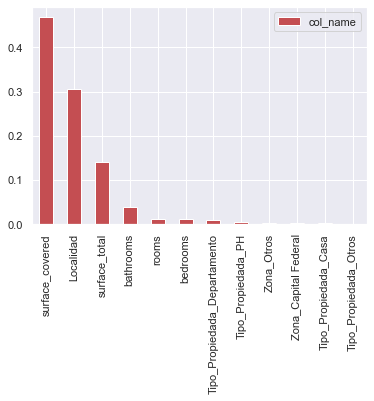

In [66]:
Importancia.plot(kind="bar",color="r")

Aqui graficando el Feature importance podemos ver cual es la variable que mas considero el modelo. Lo que mas llama la atencion pero a la vez nos resulta logico y esperable es que la variable Localidad, la cual no se considero en el Proyecto 1,es la segunda en importancia para predecir.
La mejora en los rendimientos se debe a lo mencionado anteriormente y a lo mencionado en los analisis comparativos tambien realizado anteriormente, que concluye en lo que esperabamos, es decir al realizar un mayor preprocesamiento de los datos, como imputaciones, eliminacion de outliers mas precisa, y agregar variables.

## MODELOS AVANZADOS.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Primer modelo Avanzado Seleccionado-RandomForestRegressor.**

RandomForestRegressor es un modelo de ensamble Bagging que se basa en el hecho de que promediando un conjunto de modelos (aqui son arboles), se consigue reducir la varianza. cada uno de los arboles se entrena con unos datos ligeramente distintos.

In [68]:
from sklearn.ensemble import RandomForestRegressor

Lo entrenamos con los parametros de default.

In [69]:
Model_RF=RandomForestRegressor()
Model_RF.fit(X_train,y_train)

Model_RFpredicion_test=Model_RF.predict(X_test)
Model_RFpredicion_train=Model_RF.predict(X_train)

In [70]:
print("Modelo RandomForestRegressor- Sin Optimizacino de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_RFpredicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_RFpredicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,Model_RFpredicion_train))
print("r2_score_test:",r2_score(y_test,Model_RFpredicion_test))

Modelo RandomForestRegressor- Sin Optimizacino de Hiperparametros-
 
RMSE_Train: 16510.115031487832
RMSE_test: 28927.054194521974
 
r2_score_Train: 0.9559072312595438
r2_score_test: 0.8662871958170622


Observamos que tiene un 75% diferencia entre ek train y el test por lo que tiene alta varianza, sobre ajustado a los datos de entrenamiento. Una de las maneras para reducirla es ajustar los hiperparametros.

**Optimizacio de hiperparametros del modelos RandomForestRegressor.**

En este modelo determinamos que para la optimizacino de los hiperparametros vamos a usar GridSearchCV.
Definimos la grilla con lo hiperparametros que queremos optimizar.
El parametro mas importante para redicir la varianza es el max depth por lo que probamos con baja profundidad. Con respecto a los otros hiperparametros nos quedamos cerca de los de defualt.

In [71]:
parametersRF={"n_estimators":[100,120,130,140],
              "max_depth":[10,11,12],
              "max_features":[8,10,12],
              "min_samples_split":[2,3],
              "min_samples_leaf":[1,2]}

#PARAMETROS DEFUALT_ 
#.n_estimators:100
#.max_depth: None
#.max_features: auto
#.min_samples_split:2
#.min_samples_leaf:1

In [72]:
ModelRF_OptHip=RandomForestRegressor()

Le pasamos la grilla y ponemos que haga Cross validate de 5 veces.

In [73]:
RF_GridSearchCV=GridSearchCV(ModelRF_OptHip,parametersRF,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=5)

Luego de entrenar ponemos los mejores estimadores en una variable llamada "best_modelRF" para luego evaluarla con Cross validate.

In [74]:
FitRF_GridSearchCV=RF_GridSearchCV.fit(X_train,y_train)
best_modelRF=RF_GridSearchCV.best_estimator_

Aqui vemos cuales son los parametros que optimizan el modelo.

In [75]:
FitRF_GridSearchCV.best_params_

{'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

Validamos con cross validate con 10 particiones (mas que por default) y ponemos que que el scoring sean R2 y RMSE, como no hay RMSE utilizamos la Negativa de RMSE, que es lo mismo pero solo en negativo, por lo que nos sirve totalmente para evaluarlo.

In [76]:
scoring=["neg_root_mean_squared_error","r2"]
scoresRF=cross_validate(best_modelRF,X,y, scoring=scoring, cv=10,n_jobs=-1,return_train_score=True,return_estimator=True)
sorted(scoresRF.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_neg_root_mean_squared_error',
 'test_r2',
 'train_neg_root_mean_squared_error',
 'train_r2']

In [77]:
print("train_neg_root_mean_squared_error:",scoresRF["train_neg_root_mean_squared_error"].mean())
print("test_neg_root_mean_squared_error:",scoresRF["test_neg_root_mean_squared_error"].mean())
print("-------------------------------------------------")
print("train_r2:",scoresRF["train_r2"].mean())
print("test_r2:",scoresRF["test_r2"].mean())

train_neg_root_mean_squared_error: -29725.41889072786
test_neg_root_mean_squared_error: -33949.034448191305
-------------------------------------------------
train_r2: 0.8574022435994297
test_r2: 0.8105272856492176


Aca se puede ver que luego de optimizar los hiperparametro y evaluar con un cross validate train aumento muchisimo por lo que el error es un 80% mayor y test aumento un 17% pero por otro lado la varianza se disminuyo de un 75% a un 14%. A pesar de que el los errores son mas grandes existe un mejor equilibrio entre el sesgo y la varianza. Se trata de buscar el equilibrio entre sesgo y varianza y para este modelo se da en estos niveles de error, por lo que suponemos que es ruido irreducible ( teniendo en cuenta el dataset que trabajamos).

Entrenamos y evaluamos nuevamente el modelo con los hiperparametros optimizados donde vemos cambios menores, por lo que se hizo esto es para poder ver los features importance.

In [78]:
Model_final_RF=best_modelRF

In [79]:
Model_final_RF.fit(X_train,y_train)
Model_final_RF_predicion_test=Model_final_RF.predict(X_test)
Model_final_RF_predicion_train=Model_final_RF.predict(X_train)

In [80]:
print("Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_final_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_final_RF_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,Model_final_RF_predicion_train))
print("r2_score_test:",r2_score(y_test,Model_final_RF_predicion_test))

Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-
 
RMSE_Train: 29555.252754404595
RMSE_test: 32999.22691669581
 
r2_score_Train: 0.8587018330617823
r2_score_test: 0.8259908403762497


In [81]:
Model_final_RF.feature_importances_

array([3.05661073e-01, 7.81218169e-03, 7.56875022e-03, 4.85651591e-02,
       1.75845995e-01, 4.29420922e-01, 3.74889826e-03, 3.68299852e-03,
       1.62657134e-03, 1.07584991e-02, 4.26289909e-04, 4.88266125e-03])

In [82]:
Importancia=pd.DataFrame({"col_name":Model_final_RF.feature_importances_},index=X.columns).sort_values(by="col_name",ascending=False)

<AxesSubplot:>

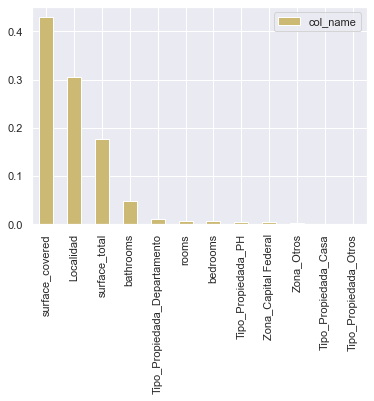

In [83]:
Importancia.plot(kind="bar",color="y")

Notamos que las cuatros variables predictoras que tienen mayor importancia son "Surface covered"/"Localidad"/"Surface Total" y " Bathrooms" que suman aproximadamente el 95% era logico de esperar que "Surface covered"y"Localidad" tenga mucha importancia y que los tipos de propiedad tanto no ya que les hicimos dummy pero igual me sorprende su nivel tan bajo de importancia.

**Segundo modelo Avanzado Seleccionado-AdaBoostRegressor**

In [84]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor es un modelo de ensamble Boosting que utiliza weak learners, donde los errores en cada intento aumentan su peso para que se resuelvan, en otras palabra van aprendiendo unos de otros (los arboles).Dando una solucion que teoricamente deberia ser mejor que la de cada arbol por separado. 

In [85]:
Model_ada=AdaBoostRegressor()
Model_ada.fit(X_train,y_train)

Model_adapredicion_test=Model_ada.predict(X_test)
Model_adapredicion_train=Model_ada.predict(X_train)

In [86]:
print("Modelo AdaBoostRegressor- Sin Optimizacino de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_adapredicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_adapredicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,Model_adapredicion_train))
print("r2_score_test:",r2_score(y_test,Model_adapredicion_test))

Modelo AdaBoostRegressor- Sin Optimizacino de Hiperparametros-
 
RMSE_Train: 52008.471620223965
RMSE_test: 52593.516917857065
 
r2_score_Train: 0.5624624255973836
r2_score_test: 0.5579931455491877


Los primero que se nota es que casi no hay varianza es aproximadamente un 1% eso es un buen y perfecto equilibrio, pero no vale de nada si es que el modelo no es capaz de reflejar la relacion real que existe entre los predictores y el target, el modelo no esta aprendiendo bien, tiene mucho sesgo.
Vamos a optimizar.

Optimizacio de hiperparametros del modelos RandomForestRegressor.

Lo promedo que hacemos es determinar una profundidad optima de arbol ya que por defaul es 3. Trataremos de identificar un max_depth que complejize el modelo pero en un punto que no lo overfitee o subreajuste.

In [87]:
lista_train= []
lista_test= []
max_depths=[3,4,6,8,10,12,14,15,16,17,18,19,20,21,22,23,24] 

for max_depth in max_depths:
    
    ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=max_depth,random_state=42))
    ada.fit(X_train,y_train)
            
    ytrain_predic=ada.predict(X_train)
    
    Train=mean_squared_error(y_train,ytrain_predic,squared=False)   
    lista_train.append(Train)
    
    Test_predic=ada.predict(X_test)         
    
    Test=mean_squared_error(y_test,Test_predic,squared=False)
    lista_test.append(Test)       

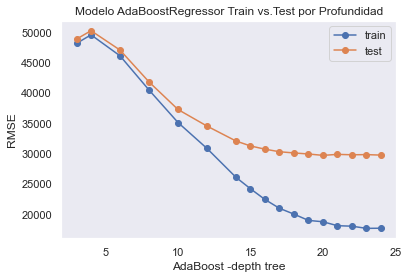

In [88]:
plt.plot(max_depths,lista_train,"o-", label="train")
plt.plot(max_depths,lista_test,"o-", label="test")
plt.title("Modelo AdaBoostRegressor Train vs.Test por Profundidad")
plt.xlabel("AdaBoost -depth tree")
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

Tomamos un max_depth de 12 ya que en el grafico se puede ver que en train se puede seguir reduciendo el error pero en test la reduccion es pequeña como para seguir subreajustando y generando mucha varianza.

En este modelo determinamos que para la optimizacino de los hiperparametros vamos a usar RandomizedSearchCV.Definimos el numero de iteraciones en 60 ya que es el 50% del total de convinaciones posible con respecto a la grilla definida.Los valores de los hiperparametros de la grilla los definimos en valores cercanos a los de defualt.

In [89]:
Model_ada_R=AdaBoostRegressor(DecisionTreeRegressor(max_depth=12, random_state=42))

In [90]:
param_ada_R={"n_estimators":[50,70,80,100,120],
             "learning_rate":[0.1,0.15,0.2,0.3,0.4,0.45,0.5,1],
             "loss":["linear","square","exponential"]}

##PARAMETROS DEFUALT_ 
#.n_estimators:50
#.learning_rate:1
#.loss: linear


In [91]:
Ada_RandomizedSearchCV=RandomizedSearchCV(Model_ada_R,param_ada_R,scoring="neg_root_mean_squared_error",n_jobs=-1,n_iter=60,cv= 5)

Luego de entrenar ponemos los mejores estimadores en una variable llamada "best_modelADA" para luego evaluarla con Cross validate.

In [92]:
FitRF_Model_ada_R=Ada_RandomizedSearchCV.fit(X_train,y_train)
best_modelADA=FitRF_Model_ada_R.best_estimator_

Aqui vemos cuales son los parametros que optimizan el modelo.

In [93]:
FitRF_Model_ada_R.best_params_

{'n_estimators': 80, 'loss': 'exponential', 'learning_rate': 0.1}

Validamos con cross validate con 10 particiones (mas que por default) y ponemos que que el scoring sean R2 y RMSE, como no hay RMSE utilizamos la Negativa de RMSE, que es lo mismo pero solo en negativo, por lo que nos sirve totalmente para evaluarlo.

In [94]:
scoringADA=["neg_root_mean_squared_error","r2"]
scoresADA=cross_validate(best_modelADA,X,y, scoring=scoringADA, cv=10,n_jobs=-1,return_train_score=True,return_estimator=True)
sorted(scoresADA.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_neg_root_mean_squared_error',
 'test_r2',
 'train_neg_root_mean_squared_error',
 'train_r2']

In [95]:
print("train_neg_root_mean_squared_error:",scoresADA["train_neg_root_mean_squared_error"].mean())
print("test_neg_root_mean_squared_error:",scoresADA["test_neg_root_mean_squared_error"].mean())
print("-------------------------------------------------")
print("train_r2:",scoresADA["train_r2"].mean())
print("test_r2:",scoresADA["test_r2"].mean())

train_neg_root_mean_squared_error: -29164.28363506696
test_neg_root_mean_squared_error: -34199.61327172112
-------------------------------------------------
train_r2: 0.8627363157548216
test_r2: 0.8075238832616114


Se logro reducir significativamente los errores tanto en test como en train.
Y se redujo significativamente el sesgo a costa de una mayor varianza que es del 17%.

Entrenamos y evaluamos nuevamente el modelo con los hiperparametros optimizados donde vemos cambios menores, por lo que se hizo esto es para poder ver los features importance.

In [96]:
Model_final_ADA=best_modelADA

In [97]:
Model_final_ADA.fit(X_train,y_train)
Model_final_ADA_predicion_test=Model_final_ADA.predict(X_test)
Model_final_ADA_predicion_train=Model_final_ADA.predict(X_train)

In [98]:
print("Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,Model_final_ADA_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,Model_final_ADA_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,Model_final_ADA_predicion_train))
print("r2_score_test:",r2_score(y_test,Model_final_ADA_predicion_test))

Modelo RandomForestRegressor- Con Optimizacion de Hiperparametros-
 
RMSE_Train: 28903.791435113228
RMSE_test: 32911.96689223123
 
r2_score_Train: 0.8648622132719235
r2_score_test: 0.8269098902644269


In [99]:
Importancia=pd.DataFrame({"col_name":Model_final_ADA.feature_importances_},index=X.columns).sort_values(by="col_name",ascending=False)

<AxesSubplot:>

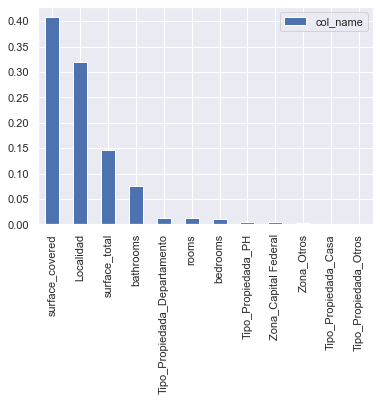

In [100]:
Importancia.plot(kind="bar")

Notamos que las cuatros variables predictoras que tienen mayor importancia son "Surface covered"/"Localidad"/"Surface Total" y " Bathrooms" que suman aproximadamente el 93% era logico de esperar que "Surface covered"y"Localidad" tenga mucha importancia.

**Analisis comparativo de los modelos avanzados.**

Primero notamos que las cuatros variables predictoras que tienen mayor importancia son las mismas en ambos modelos y en orden, estas son "Surface covered"/"Localidad"/"Surface Total" y " Bathrooms". Creo que esto se debe a que los dos modelos seleccionado son de ensamble que a pesar se sus diferencias de funcionamiento se basan en Arboles de Decision.

Segundo como mencione anteriormente lo que se trata de hacer es encontrar un equilibrio entre sesgo y varianza ya que no existe modelo perfecto.

Tercero notamos que los modelos hacen lo que corresponde el Forest Random lo que hace es bajar la varianza y vemos que lo hace ya que en el modelo entrenado con parametros por default esta era muy alta.
El modelo adaboost baja el sesgo lo cual vimos que lo redujo significativamente con respecto al modelo entrenado con parametros por default ya que con los valores de el RMSE tan altos se notaba que no aprendia correctamente.

Por ultimo en comparativa, el modelo que elegimos es el RandomForest ya que su RSME en test es menor, por muy poca diferencia 0.73%.  

**Analisis de comparacion de los modelos avanzados y el de la seccion A.**
En relacion a el modelo de arboles de decision tomado del primer proyecto y vuelto a entrenar con el nuevo dataset se vio que tenia alto sesgo y alta varianza por lo que se utilizaron los modelos avanzados para reducirlos, el Adaboost disminuye sesgo y el RandomForest disminuye varianza, pero esta relacino siempre juega un papel en donde si disminuimos varianza sube el sesgo y alreves. 

Lo que se nota es que al utilizar modelos mas flexibles ( mas complejos) se puede equilibrar mas la relacion que mencionabamos entre sesgo y varianza a su vez por lo resultados obtenidos no son grandes las diferencias de los errores pero si notamos que los modelos avanzado aprenden mas y mejor ya que captan mejor la relacion entre los predictores y la variables respuesta como tambien no varian demasiado los resultado en el dataset test.

## Eleccion de arboles al azar.

Sobre el modelo RandomForestRegressor el cual nos dio el mejor desempeño.

Elegimos los arboles numero 10,50,100 y 119 los parametros mas relevantes son justamente los que obtivimos en el GridSearch. Los parametros son todos iguales salvo el random_state.
Se observa que en cada arbol los resultados del error tanto en train como en test varian, esta variacion en pequeña pero denota el funcionamiento del modelo RandomForest que realiza el promedio de todos sus arboles dando un mejor resultado en su conjunto que por arbol individual.

In [101]:
RF_tree10=Model_final_RF.estimators_[10]
RF_tree10.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 699573872,
 'splitter': 'best'}

In [102]:
RF_tree_predicion_test=RF_tree10.predict(X_test)
RF_tree_RF_predicion_train=RF_tree10.predict(X_train)
print("Arbol 10: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,RF_tree_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,RF_tree_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,RF_tree_RF_predicion_train))
print("r2_score_test:",r2_score(y_test,RF_tree_predicion_test))

Arbol 10: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-
 
RMSE_Train: 33358.20168189291
RMSE_test: 37095.71699742587
 
r2_score_Train: 0.8200000301254972
r2_score_test: 0.7801066388555677


In [103]:
RF_tree50=Model_final_RF.estimators_[50]
RF_tree50.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1358171955,
 'splitter': 'best'}

In [104]:
RF_tree_predicion_test=RF_tree50.predict(X_test)
RF_tree_RF_predicion_train=RF_tree50.predict(X_train)
print("Arbol 50: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,RF_tree_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,RF_tree_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,RF_tree_RF_predicion_train))
print("r2_score_test:",r2_score(y_test,RF_tree_predicion_test))

Arbol 50: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-
 
RMSE_Train: 33488.780928363056
RMSE_test: 37495.77596416828
 
r2_score_Train: 0.8185880677023448
r2_score_test: 0.775338181676914


In [105]:
RF_tree100=Model_final_RF.estimators_[100]
RF_tree100.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1346536383,
 'splitter': 'best'}

In [106]:
RF_tree_predicion_test=RF_tree100.predict(X_test)
RF_tree_RF_predicion_train=RF_tree100.predict(X_train)
print("Arbol 100: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,RF_tree_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,RF_tree_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,RF_tree_RF_predicion_train))
print("r2_score_test:",r2_score(y_test,RF_tree_predicion_test))

Arbol 100: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-
 
RMSE_Train: 33905.832410610245
RMSE_test: 37022.013335275886
 
r2_score_Train: 0.8140415171183233
r2_score_test: 0.7809795614954813


In [107]:
RF_tree119=Model_final_RF.estimators_[119]
RF_tree119.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1699562683,
 'splitter': 'best'}

In [108]:
RF_tree_predicion_test=RF_tree119.predict(X_test)
RF_tree_RF_predicion_train=RF_tree119.predict(X_train)
print("Arbol 100: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-")
print(" ")
print("RMSE_Train:",mean_squared_error(y_train,RF_tree_RF_predicion_train, squared=False))
print("RMSE_test:",mean_squared_error(y_test,RF_tree_predicion_test, squared=False))
print(" ")
print("r2_score_Train:",r2_score(y_train,RF_tree_RF_predicion_train))
print("r2_score_test:",r2_score(y_test,RF_tree_predicion_test))

Arbol 100: Modelo RandomForestRegressor-Con Optimizacion de Hiperparametros-
 
RMSE_Train: 33589.2856012005
RMSE_test: 36947.989192868605
 
r2_score_Train: 0.817497546879979
r2_score_test: 0.7818545323695418


## Grafico y analisis de la dispersion de los errores.

Modelos DecisionTreeRegressor - RandomForestRegressor - AdaBoostRegressor.(los graficos estan es este orden).

Podemos observar en el histograma de DecisionTreeRegressor que la mayor concentracion se da en torno a 0 (cero) lo que nos indica que la mayot cantidad de predicciones no poseen error y esto va disminuyendo hacia los extremos donde encontramos mayores errores.
Vemos que la mayor diferencia entre train y test se da en torno a 0 (cero) lo que es normal ya que ne test el modelo predice sobre datos nunca vistos.
En el scatterplot donde relacionamos las predicciones y los datos reales de la variable target vemos una mayor concentracion en los precios menores y como se van dispersando en los altos, pero en general siempre hay puntos muy dispersos entorno a la curva. 
Tanto en el - RandomForestRegressor - como en el - AdaBoostRegressor - en los histogramas vemos que la deferencia en el train y test disminuye en torno al 0 (cero), dando un mejor equilibrio.
En los scatterplots notamos que la concentracion en torno a la curva se prolonga alrededor y proxima desde precios bajos hasta altos de mejor manera que en el -DecisionTreeRegressor- aunque siguen existiendo diferencia, esto denota que los modelos mas flexibles logran entender mejor la relacion de las variables predictoras y la target por lo que son capaces de predecir mejor-

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

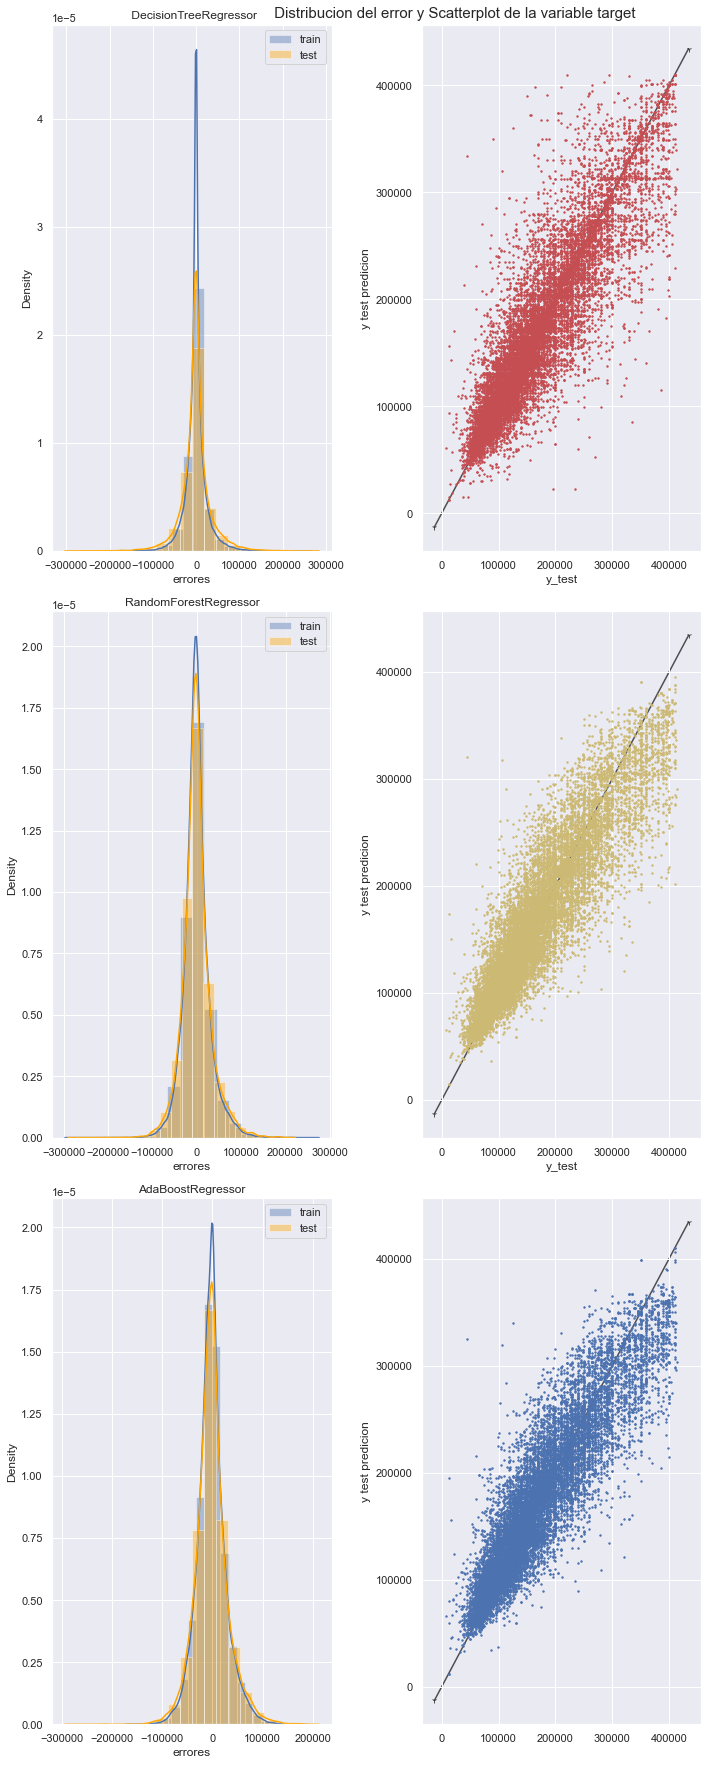

In [109]:
sns.set()
plt.figure(figsize=(10,25))
plt.suptitle("                                                  Distribucion del error y Scatterplot de la variable target ",fontsize=15)
plt.xlabel("y_test")
plt.subplot(3,2,1)
sns.distplot(y_train - Dec_TreeR_predicion_train,bins=20,kde=True, label= "train")
sns.distplot(y_test - Dec_TreeR_predicion_test,bins=20,kde=True,color="orange", label= "test")
plt.xlabel("errores")
plt.legend()
plt.title(" DecisionTreeRegressor")
ax=plt.subplot(3,2,2)
ax.scatter(y_test,Dec_TreeR_predicion_test,color="r",s=2)
lims= [np.min([ax.get_xlim(),ax.get_ylim()]),np.max([ax.get_xlim(),ax.get_ylim()]),]
ax.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.ylabel("y test predicion")

plt.xlabel("y_test")
plt.subplot(3,2,3)
sns.distplot(y_train - Model_final_RF_predicion_train,bins=20,kde=True, label= "train")
sns.distplot(y_test - Model_final_RF_predicion_test,bins=20,kde=True,color="orange", label= "test")
plt.xlabel("errores")
plt.legend()
plt.title("RandomForestRegressor")
ax=plt.subplot(3,2,4)
ax.scatter(y_test,Model_final_RF_predicion_test,color="y",s=2)
lims= [np.min([ax.get_xlim(),ax.get_ylim()]),np.max([ax.get_xlim(),ax.get_ylim()]),]
ax.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.ylabel("y test predicion")

plt.xlabel("y_test")
plt.subplot(3,2,5)
sns.distplot(y_train - Model_final_ADA_predicion_train,bins=20,kde=True, label= "train")
sns.distplot(y_test - Model_final_ADA_predicion_test,bins=20,kde=True,color="orange", label= "test")
plt.xlabel("errores")
plt.legend()
plt.title("AdaBoostRegressor")
ax=plt.subplot(3,2,6)
ax.scatter(y_test,Model_final_ADA_predicion_test,color="b",s=2)
lims= [np.min([ax.get_xlim(),ax.get_ylim()]),np.max([ax.get_xlim(),ax.get_ylim()]),]
ax.plot(lims,lims,"k-1",alpha=0.75, zorder=0)
plt.ylabel("y test predicion")

plt.tight_layout()
plt.show()

## Conclusion

La conclusion a la que llego, no es mas que parte de los analisis que fui haciendo en cada seccion del proyecto.
Todos los modelos de machine learning sufre de problemas de equilibrio entre bias y varianza y que el mejor modelo es aquel que consigue este equilibrio ya que no existe un modelo perfecto. Este equilibrio optimo tiene que ser evaluado segun el modelo a utilizar y el dataset con el que contamos en donde veo el mayor desafio ya que tenemos que preprocesarlo de manera consiente y detallada, pero cabe destacar que este dataset tiene que ser de una minima calidad y con una cantidad de datos e instancias que considerable como para poder entrenar bien a los modelos y sacarles el mejor provecho.
Entre los dos modelos avanzados que entrene y evalue el -RandomForestRegressor-
fue el mejor, ya que el error (RMSE) fue el inferior a nivel test y la varianza tambien era mejor. Los resultados entre ambos no tuvieron grandes diferencias, un 0.73% menor el RMSE  y un 3% menos de varianza en el RandomForest con respecto al AdaBoost.
El dataset se comporto, en cierta manera, como esperaba ya que despues del preprocesamiento y haber agregado la variable Localidad, la cual siempre crei que era la mas importante, se redujo significativamente el error (RMSE), pero crei que este error (RMSE el utilizado para evaluar) iba a llegar a estar en valores mucho menores ya que 30mil dolares es mucho para una implementacion real; por lo que sigo pensando que habria que trabajar con un dataset mas grande y de mayor calidad, como tambien trabajar de mejor manera la variable tipo de propiedad.

## Adicional.

Como seccion adicional, se realizara un clusterizacion en relacion a las variables "Bedrooms" y "price" del dataset, el modelo que utilizaremos sera el K-Means.

Por que elegimos estas variables: se quiere tener segmentada las distinta propiedades con distintas cantidades de habitaciones en relacion al precio, ya que ante las consultas por viviendas, donde el prospecto busca deteminada cantidad de habitaciones con un determinado presupuesto.
Se podria pensar que a mayor cantidad de habitaciones mayor sera el precio,esto el logico si no consideramos la ubicacion, pero dado que existe y es muy importante esto hara, por ejemplo que el una vivienda con 3 cuartos tenga distintos precios en distintas localidades.

Esta clusterizacion nos dara cierta cantidad de Clusters ,que se basaran en un rango de precios donde en cada precio habra propiedades con variada cantidad de habitaciones.

Vamos a utilizar el dataset sin escalar para entender mejor el grafico, ademas al relacionar solo dos variables de las cuales precio nunca fue escalada, el hecho de que Bedrooms no lo este no impactara, ya que sabemos que este modelo es sensible al escalado.

In [184]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

El metodo K-Means necesita que le pasemos cuantos clusters queremos y dado que no sabemos cual es la cantidad optima, utilizaremos el metodo elbow para determinarlo.

In [185]:
K=range(1,13)
wss=[]
for k in K:
    Kmean=KMeans(n_clusters=k, random_state=0)
    Kmean.fit(datasetSS[["price","bedrooms"]])
    wss_iter=Kmean.inertia_
    wss.append(wss_iter)

Vemos que el codo se forma en 3, esta sera nuestra cantidad de clusters.

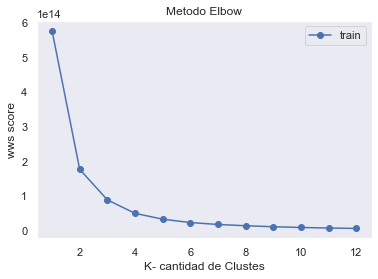

In [186]:
plt.plot(K, wss,"o-", label="train")
plt.title("Metodo Elbow")
plt.xlabel("K- cantidad de Clustes")
plt.ylabel("wws score")
plt.grid()
plt.legend()
plt.show()

Igualmente para corroborar esta cantidad de clusters a pasarle al modelo K-Means vamos a corroborar la misma utilizando el metodo Silhouette.

Observamos que el valor mayor sigue correspondiendo a la custerizacion de cantidad 3.

In [187]:
K=range(3,9)
for i in K:
    lables=KMeans(n_clusters=i, random_state=0).fit(datasetSS[["price","bedrooms"]]).labels_
    print("Silhouette score para" +str(i)+ "clusters es" +str(metrics.silhouette_score((datasetSS[["price","bedrooms"]]),lables,metric="euclidean",random_state=0)))

Silhouette score para3clusters es0.5596844954488684
Silhouette score para4clusters es0.5571023414571816
Silhouette score para5clusters es0.543997648689447
Silhouette score para6clusters es0.5439841981831519
Silhouette score para7clusters es0.5314392005461014
Silhouette score para8clusters es0.5261418378332324


Creamos el modelo y lo entrenamos.

In [188]:
Model_Kmean=KMeans(n_clusters=3, random_state=0)

In [190]:
Model_Kmean.fit(datasetSS[["price","bedrooms"]])

KMeans(n_clusters=3, random_state=0)

Observamos lo centroides.

In [191]:
Model_Kmean.cluster_centers_

array([[1.85386131e+05, 1.86078472e+00],
       [1.01451182e+05, 1.34697342e+00],
       [3.02043587e+05, 2.33010502e+00]])

Asignamos las etiquetas a una variable.

In [197]:
etiqutas=Model_Kmean.labels_

In [198]:
datasetSS["cluster"]=etiqutas

Y generando una nueva columna integramos las etiquetas al dataset.

In [199]:
datasetSS.head(2)

,Localidad,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Zona_Capital Federal,Zona_Otros,Tipo_Propiedada_Casa,Tipo_Propiedada_Departamento,Tipo_Propiedada_Otros,Tipo_Propiedada_PH,cluster
0,2570.138868,3.0,2.0,2.0,89.0,79.0,219000.0,0,1,1,0,0,0,0
1,2000.281432,3.0,1.0,2.0,116.0,116.0,290000.0,1,0,1,0,0,0,2


Aqui vemos la cantidad de propiedades del dataset que corresponden a cada cluster.

In [200]:
dataset1["cluster"].value_counts()

1    43593
0    33621
2    15901
Name: cluster, dtype: int64

Graficamos. Y vemos lo antes dicho, que en los distitos rangos de precios habra propiedades con variada cantidad de habitaciones.

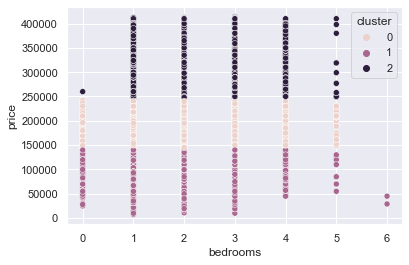

In [201]:
sns.scatterplot(x="bedrooms",y="price",hue="cluster",data=datasetSS)
plt.show()
